In [355]:
import os


def warn(*args, **kwargs):
    pass


import warnings

warnings.warn = warn

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from bisect import bisect_left
from typing import List

import scipy.stats as ss
from scipy.stats import mannwhitneyu


In [ ]:
pattern = 'selector'
iid_percentage = '0'
N_high = 5
N_low = 5
data_persistence = 'new'
ratio = '{}high-{}low'.format(N_high, N_low)
folders = ['vm/{}/{}/{}iid'.format(data_persistence, ratio, iid_percentage)]
exp_data = []

for folder in folders:
    experiments = [subfolder for subfolder in os.listdir(os.getcwd() + '/' + folder)]
    for exp in experiments:
        exp_path = os.getcwd() + '/' + folder + '/' + exp
        if 'FLwithAP_performance_metrics.csv' in os.listdir(exp_path):
            df = pd.read_csv(exp_path + '/FLwithAP_performance_metrics.csv')
            df = df[df['Val F1'] >= 0]
            df['Cumulative Time'] = df['Total Time of FL Round'].cumsum()
            print(df)
            df['F1 Score Over Total Time for FL Round'] = df['Val F1'] / df['Cumulative Time']
            model_data = df[df['Val F1'] >= 0]
            exp_data.append((folder + '-' + exp, model_data))

   Client ID  FL Round  Training Time  Communication Time  \
2   Client 3         1          23.66               23.43   
5   Client 3         2          24.43               24.95   
11  Client 6         3          25.91               25.61   
17  Client 6         4          24.64               26.13   
23  Client 6         5          24.69               25.38   
29  Client 6         6          25.23               25.50   
32  Client 3         7          22.65               24.43   
35  Client 3         8          24.30               24.13   
41  Client 6         9          25.44               25.88   
44  Client 3        10          23.88               25.78   
50  Client 6        11          25.04               26.26   
53  Client 3        12          23.67               25.98   
59  Client 6        13          25.29               25.30   
62  Client 3        14          24.00               25.04   
68  Client 6        15          25.69               26.02   
71  Client 3        16  

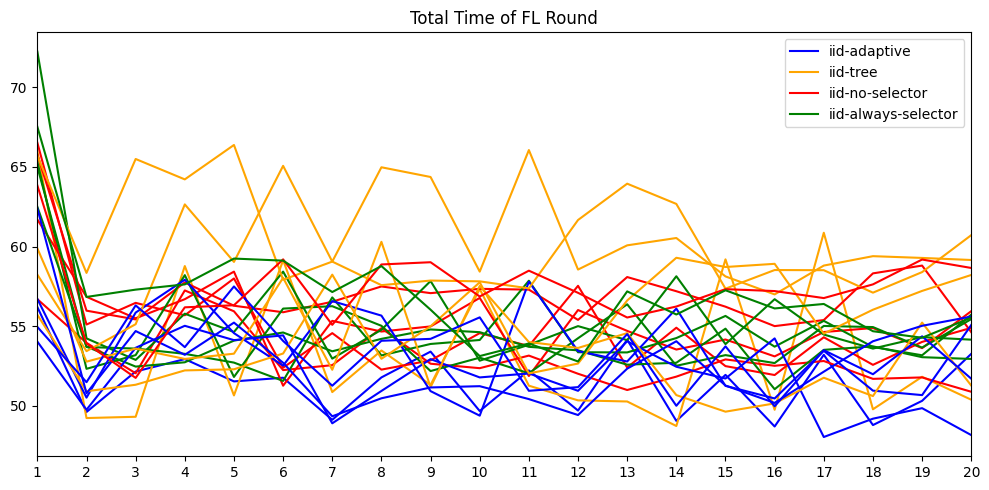

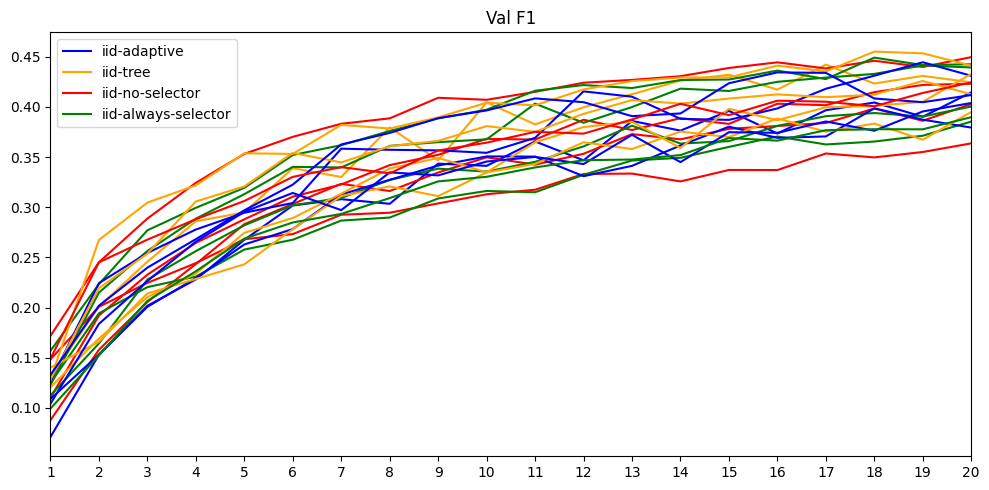

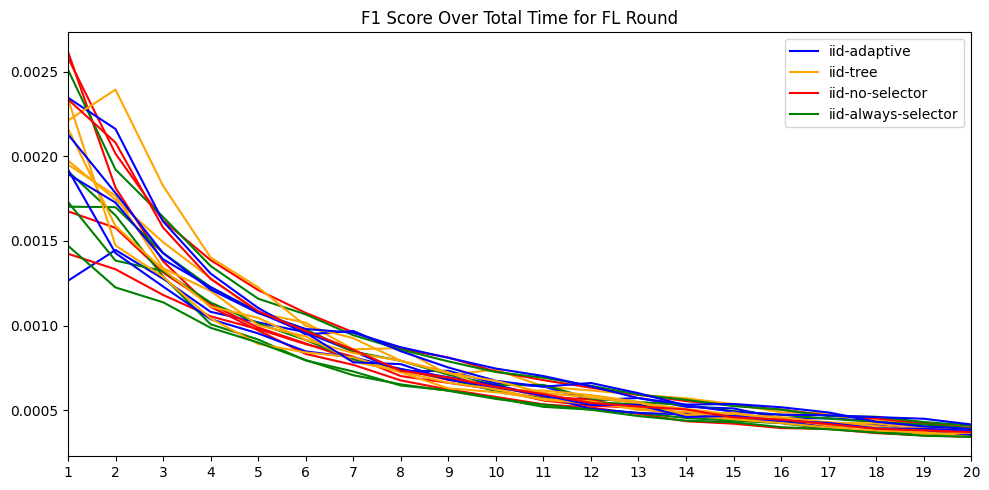

In [ ]:
configurations = ['no-selector', f'random-{pattern}', f'always-{pattern}', f'fixed-{pattern}', f'tree-{pattern}', f'bo-{pattern}']
selected_confs = []
for folder in folders:
    selected_confs.extend([folder + '-' + conf for conf in configurations])
metrics = ['Total Time of FL Round', 'Val F1', 'F1 Score Over Total Time for FL Round']

colors = {'no-selector': ['red', False, False, 'never'],
          'always-selector': ['green', False, False, 'always'],
          'always-hdh': ['green', False, False, 'always'],
          'random-selector': ['purple', False, False, 'random'],
          'random-hdh': ['purple', False, False, 'random'],
          'fixed-selector': ['blue', False, False, 'fixed'],
          'fixed-adaptive': ['blue', False, False, 'fixed'],
          'fixed-hdh': ['blue', False, False, 'fixed'],
          'tree-selector': ['orange', False, False, 'tree'],
          'tree-adaptive': ['orange', False, False, 'tree'],
          'bo-selector': ['pink', False, False, 'bo'],
          'bo-adaptive': ['pink', False, False, 'bo']}

for metric in metrics:
    fig, ax = plt.subplots(figsize=(10, 5))

    for exp, model_data in exp_data:
        conf = exp.split('_')[0].split('iid-')[1]
        noniid = 'noniid' in exp
        style = '--' if noniid else '-'
        label = 'noniid-' + colors[conf][3] if noniid else 'iid-' + colors[conf][3]
        if not (conf in configurations):
            continue
        if noniid and colors[conf][2]:
            ax.plot(model_data['FL Round'], model_data[metric], linestyle=style, color=colors[conf][0])
        elif not noniid and colors[conf][1]:
            ax.plot(model_data['FL Round'], model_data[metric], linestyle=style, color=colors[conf][0])
        else:
            ax.plot(model_data['FL Round'], model_data[metric], linestyle=style, color=colors[conf][0], label=label)
            if noniid:
                colors[conf][2] = True
            else:
                colors[conf][1] = True

    for conf in colors:
        colors[conf][1] = False

    ax.set_title(metric)
    ax.set_xticks([i + 1 for i in range(len(model_data['FL Round']))])
    ax.set_xlim(1, len(model_data['FL Round']))
    ax.legend()

    fig.tight_layout()
    fig.savefig('plots/{}/{}iid-{}.png'.format(ratio, iid_percentage, metric), dpi=300)

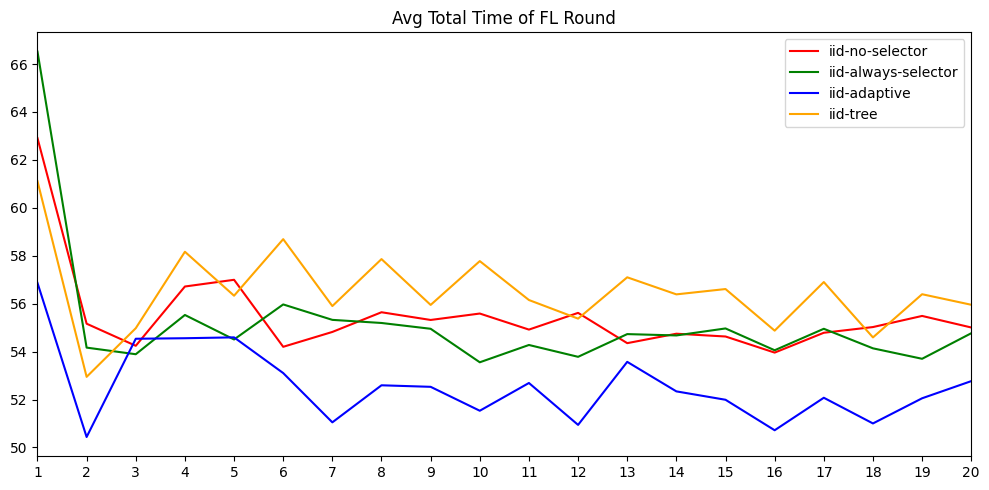

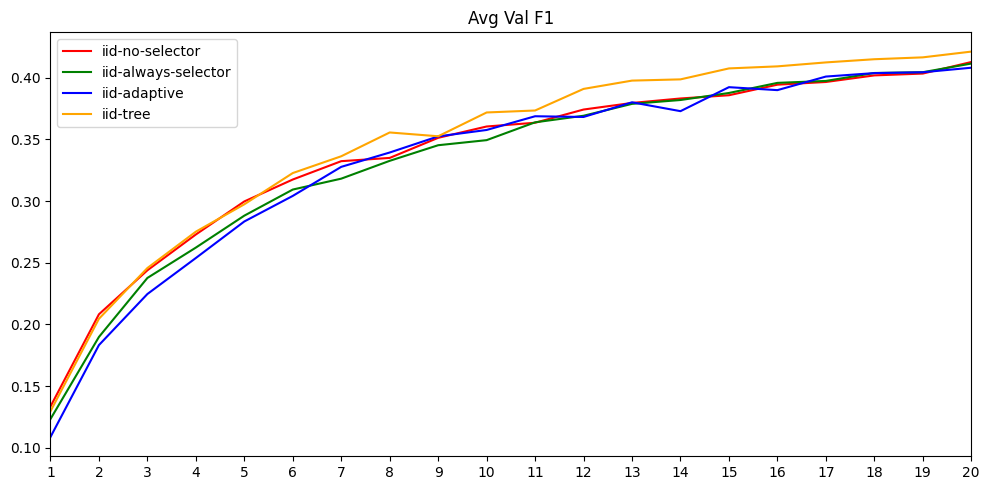

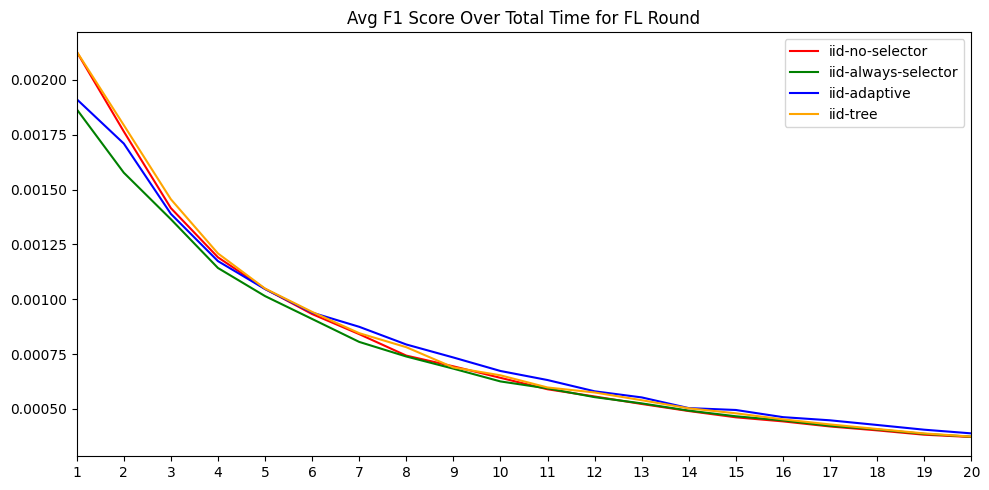

In [358]:
avg_data = {metric: {conf: [] for conf in selected_confs} for metric in metrics}

for metric in metrics:
    fig, ax = plt.subplots(figsize=(10, 5))

    for conf in selected_confs:
        data = [model_data[metric].tolist() for exp, model_data in exp_data if exp.split('_')[0] == conf]
        try:
            for i in range(len(data[0])):
                avg_data[metric][conf].append(sum([v[i] for v in data]) / len(data))
        except IndexError:
            continue

        conf4color = conf.split('iid-')[1]
        noniid = 'noniid' in conf
        style = '--' if noniid else '-'
        label = 'noniid-' + colors[conf4color][3] if noniid else 'iid-' + colors[conf4color][3]
        ax.plot(avg_data[metric][conf], color=colors[conf4color][0], label=label, linestyle=style)

        title = 'Avg ' + metric
        ax.set_title(title)
        ax.set_xticks([i for i in range(len(avg_data[metric][conf]))],
                      labels=[i + 1 for i in range(len(avg_data[metric][conf]))])
        ax.set_xlim(0, len(avg_data[metric][conf]) - 1)
        ax.legend()

        fig.tight_layout()
        fig.savefig('plots/{}/{}iid-{}.png'.format(ratio, iid_percentage, title), dpi=300)


[0.0004096269159968651, 0.0003646007766322402, 0.0003704157763844618, 0.0003426083842942889, 0.000370483558318635]
[0.00035230649659397426, 0.0003939296092993218, 0.0003658882135185777, 0.0004100548717188195, 0.0003428375370593566]
[0.00040245904027503946, 0.0003535805507392285, 0.00041577814873066564, 0.00038992281100535116, 0.00037911933151816733]
[0.00039714029046264405, 0.00039192775558635187, 0.00036828567610903257, 0.00034175285070273137, 0.000367889549291051]


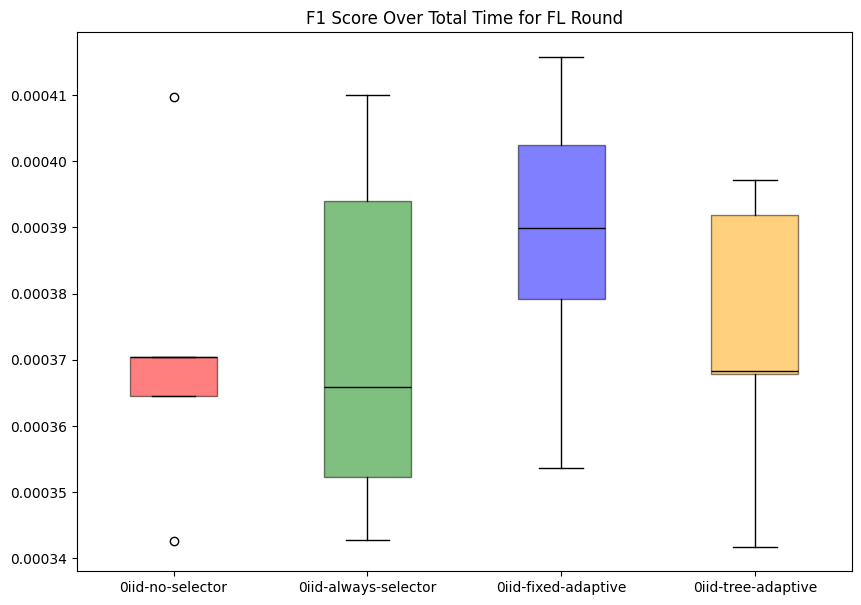

In [ ]:
metric = 'F1 Score Over Total Time for FL Round'
colors = ['red', 'purple', 'green', 'blue', 'orange', 'pink']
labels = ['never', 'random', 'always', 'fixed', 'tree', 'bo']
d = []
for conf in selected_confs:
    d.append([])
    data = [model_data[metric].tolist() for exp, model_data in exp_data if exp.split('_')[0] == conf]
    for i in range(len(data)):
        d[-1].append(data[i][-1])
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
meanprops = dict(marker='^', markerfacecolor='white', markeredgecolor='black', markersize=8)
bp = ax.boxplot(d, labels=labels, patch_artist=True, showmeans=True, meanprops=meanprops)
# fill with colors
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for median in bp['medians']:
    median.set_color('black')
# ax.set_title('{} high - {} low - {}% iid'.format(N_high, N_low, iid_percentage))
offset_text = ax.yaxis.get_offset_text()
offset_text.set_verticalalignment('bottom')  # Align text top to bottom position
offset_text.set_position((-0.12, -1.0))      # (x, y) in axis coordinates; tweak x as needed
fig.tight_layout()
fig.savefig('plots/exp/{}/{}-{}-{}-{}.png'.format(data_persistence, pattern, N_high, N_low, iid_percentage), dpi=300)

In [ ]:
def VD_A(treatment: List[float], control: List[float]):
    """
    Computes Vargha and Delaney A index
    A. Vargha and H. D. Delaney.
    A critique and improvement of the CL common language
    effect size statistics of McGraw and Wong.
    Journal of Educational and Behavioral Statistics, 25(2):101-132, 2000
    The formula to compute A has been transformed to minimize accuracy errors
    See: http://mtorchiano.wordpress.com/2014/05/19/effect-size-of-r-precision/
    :param treatment: a numeric list
    :param control: another numeric list
    :returns the value estimate and the magnitude
    """
    m = len(treatment)
    n = len(control)

    if m != n:
        raise ValueError("Data d and f must have the same length")

    r = ss.rankdata(treatment + control)
    r1 = sum(r[0:m])

    # Compute the measure
    # A = (r1/m - (m+1)/2)/n # formula (14) in Vargha and Delaney, 2000
    A = (2 * r1 - m * (m + 1)) / (2 * n * m)  # equivalent formula to avoid accuracy errors

    levels = [0.147, 0.33, 0.474]  # effect sizes from Hess and Kromrey, 2004
    magnitude = ["negligible", "small", "medium", "large"]
    scaled_A = (A - 0.5) * 2

    magnitude = magnitude[bisect_left(levels, abs(scaled_A))]
    estimate = A

    return estimate, magnitude


metric = 'F1 Score Over Total Time for FL Round'
d = []
for conf in selected_confs:
    d.append([])
    data = [model_data[metric].tolist() for exp, model_data in exp_data if exp.split('_')[0] == conf]
    for i in range(len(data)):
        d[-1].append(data[i][-1])

with open('plots/{}/{}iid-VD_A.txt'.format(ratio, iid_percentage), 'w') as f:
    pairs = [(0,2), (1, 2)]
    for pair in pairs:
        d_1 = d[pair[0]]
        d_2 = d[pair[1]]
        U1, p = mannwhitneyu(d_1, d_2, method="auto")
        estimate, magnitude = VD_A(d_1, d_2)
        conf_a = selected_confs[pair[0]].split('/')[-1].replace('{}iid-'.format(iid_percentage), '')
        conf_b = selected_confs[pair[1]].split('/')[-1].replace('{}iid-'.format(iid_percentage), '')
        f.write('{}\t{}\t{:.3f}\t{}\t{}\n'.format(conf_a, conf_b, p, estimate, magnitude))  
